# The battle of Neighborhoods : Tehran Venues analyze

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import csv
import numpy as np 
import pandas as pd
import requests 
from pandas.io.json import json_normalize 
import json 
from geopy.geocoders import Nominatim 
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium


## Imorting DATA :
### This data includes 5 Neighborhoods in Tehran, Iran


Consider that you are coming to living in Tehran to start a business , you don't know much about this city , after a few searching about this city, you consider 6 neighborhoods for starting your business, but still, you don't know how to choose one of these neighborhoods which is the best location for your job. How you want to understand and solve the problem ?! it's not 50 years ago when computers were not good enough so it's not proper for you to go walking in these neighborhoods and do your own research. so you need a consultant to tell you how you must choose the location ?! and tells you why that location is the best for you?In this project, I chose 6 neighborhoods in Tehran and obtain their coordinates by Wikipedia and google maps.these neighborhoods are mentioned below with their coordinates.they are in central and north areas of Tehran.by analyzing these neighborhoods veneus with assistance by Foursquare API, and visualizing various factors and features for the client, the client can find out which neighborhood is proper for start the business . Data locations are illustrated below :

In [2]:
df=pd.read_csv('C:\\Users\\Ashkan\\DS_training\\Final Capstone_IBM\\Tehran.csv')
df

,Neighborhood,Latitude,Longitude
0,Bagh Feiz,35.744200,51.322500
1,Abbas Abad,35.735556,51.435556
2,City Park,35.683333,51.416667
3,Amir Abad,35.740744,51.391598
4,Darakeh,34.448333,47.670833
5,Darband,35.823311,51.425028


### Creating the Map

In [3]:
address = 'Tehran, Iran'
geolocator = Nominatim(user_agent="can_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Tehran are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Tehran are 35.7006177, 51.4013785.


In [4]:
Tehran = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='black',
        fill=True,
        fill_color='red',
        fill_opacity=0.8,
        parse_html=False).add_to(Tehran)  
    
Tehran

#### Using Forsquare API :

In [5]:
LIMIT = 70
CLIENT_ID = 'GNRHQWT3CFCASPET1ZFGXS44E3QFY0PIZMLUMQ2D4C5KRFQY' 
CLIENT_SECRET = 'RWC1WXVECHQYDYLQGZ1MVBJ15SAUSGLWBL50EGTZ3JTPKCSX' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GNRHQWT3CFCASPET1ZFGXS44E3QFY0PIZMLUMQ2D4C5KRFQY
CLIENT_SECRET:RWC1WXVECHQYDYLQGZ1MVBJ15SAUSGLWBL50EGTZ3JTPKCSX


In [6]:
def neighbor(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
       
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Data Analayzing

In [7]:
venues_Tehran = neighbor(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude'],
                                  )

Bagh Feiz
Abbas Abad
City Park
Amir Abad
Darakeh
Darband


In [8]:
venues_Tehran.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bagh Feiz,35.7442,51.3225,Eden Home Accessories,35.741793,51.322152,Furniture / Home Store
1,Bagh Feiz,35.7442,51.3225,Kaaj Park | بوستان كاج,35.746818,51.321806,Park
2,Bagh Feiz,35.7442,51.3225,West Diamond | شيرينى الماس غرب,35.740984,51.320589,Pastry Shop
3,Bagh Feiz,35.7442,51.3225,Bagh-e Feyz Square | میدان باغ فیض (میدان باغ ...,35.746028,51.325934,Plaza
4,Bagh Feiz,35.7442,51.3225,نانوایی سنگکی باغ فیض,35.746162,51.326198,Bakery


In [9]:
venues_Tehran.shape

(89, 7)

### plot settings :

In [10]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)

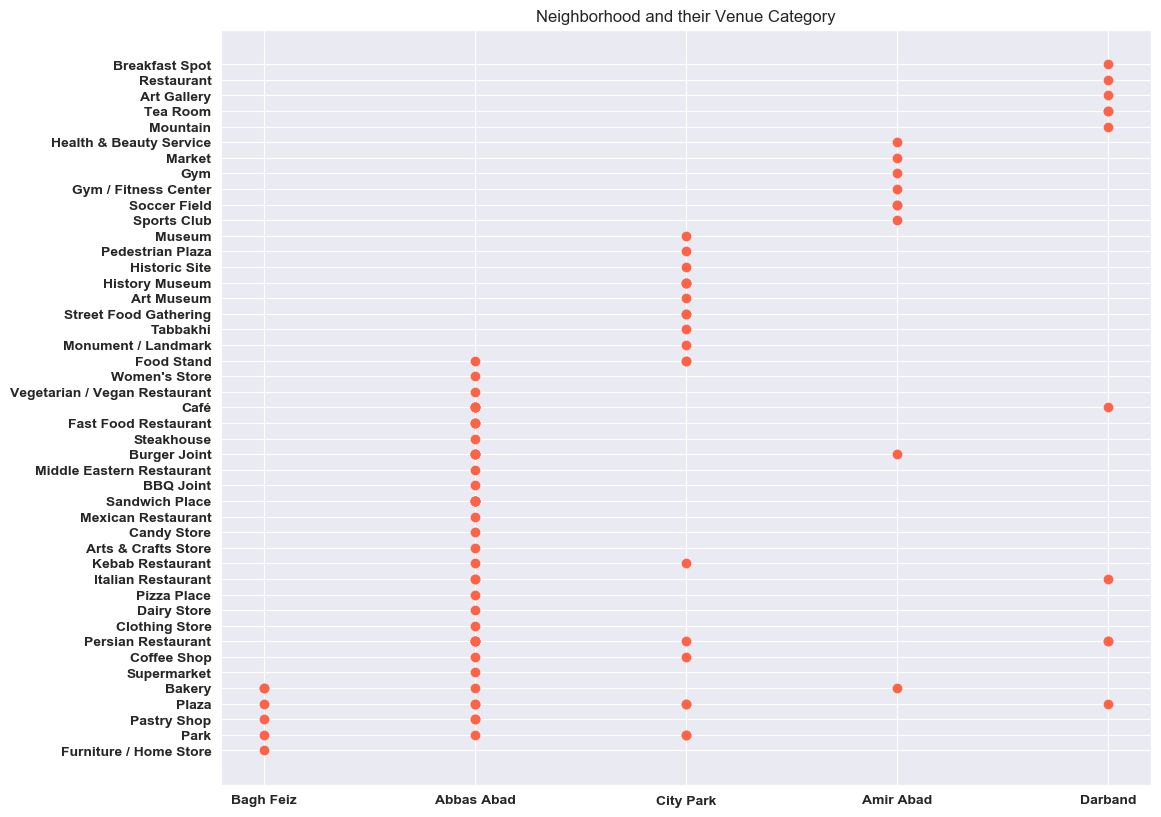

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,10),dpi=100);
plt.scatter('Neighborhood','Venue Category',data=venues_Tehran,c='tomato')
plt.title('Neighborhood and their Venue Category');

#### The below figure shows the most venues in these neighborhoods are Plaza and Pizza place.

In [12]:
sns.set(font_scale=1.8)  

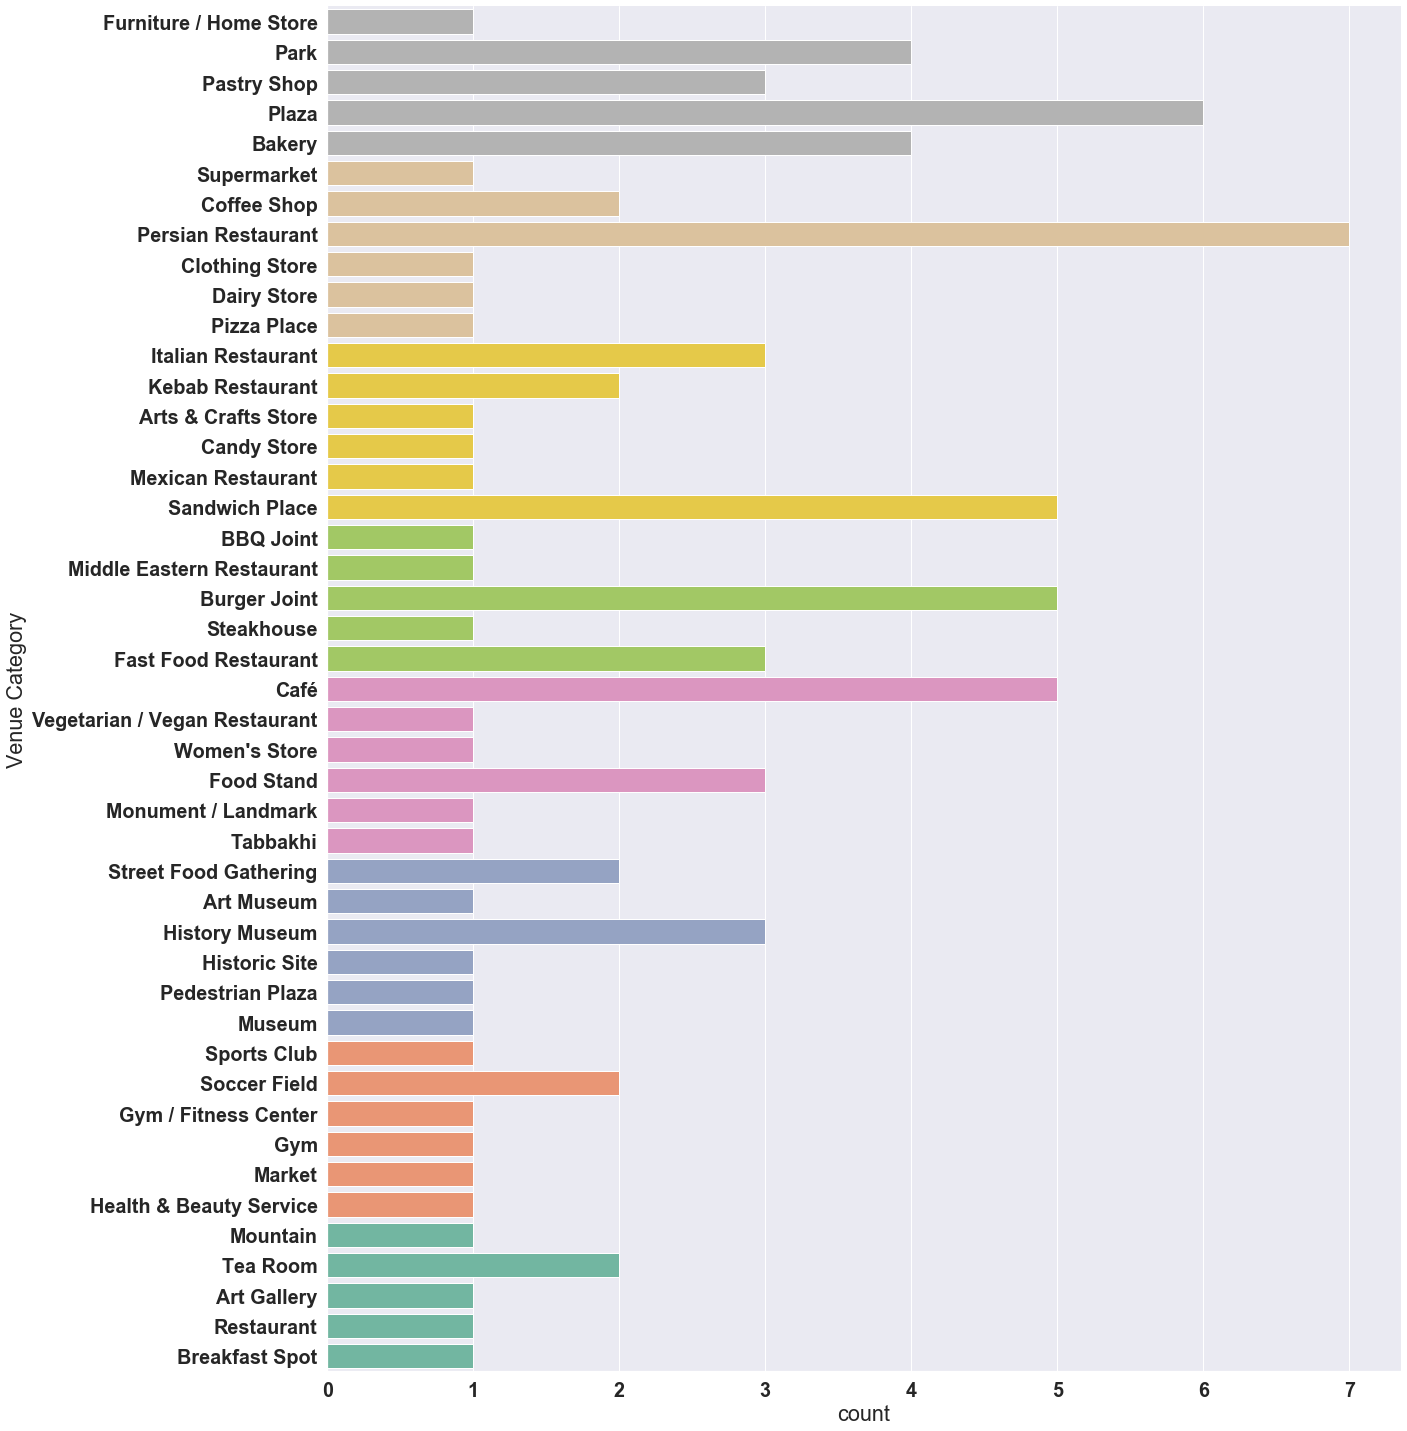

In [13]:
sns.catplot(y="Venue Category", kind="count",palette="Set2_r", edgecolor="1",data=venues_Tehran,height=20);

C:\Users\Ashkan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Ashkan\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Ashkan\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Ashkan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ashkan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


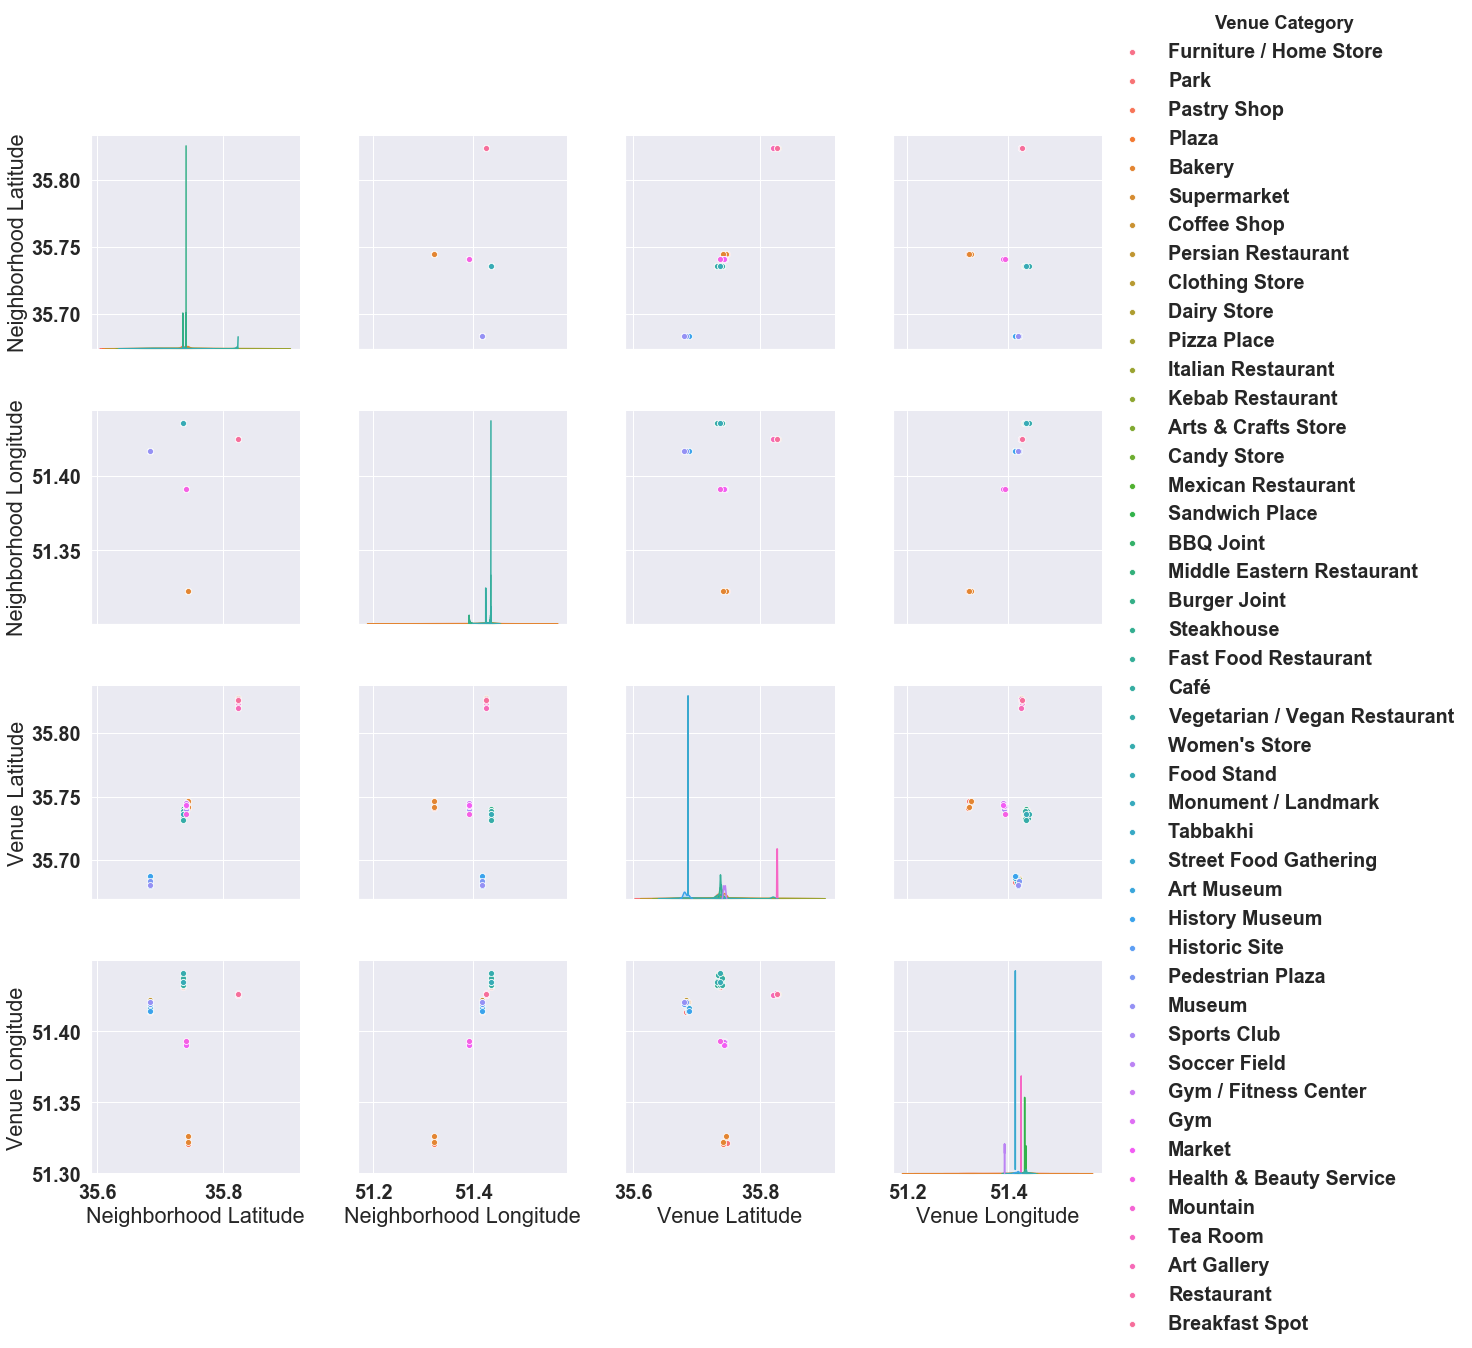

In [14]:
sns.set_style('darkgrid')
sns.pairplot(venues_Tehran,size=4,aspect=1,hue="Venue Category");

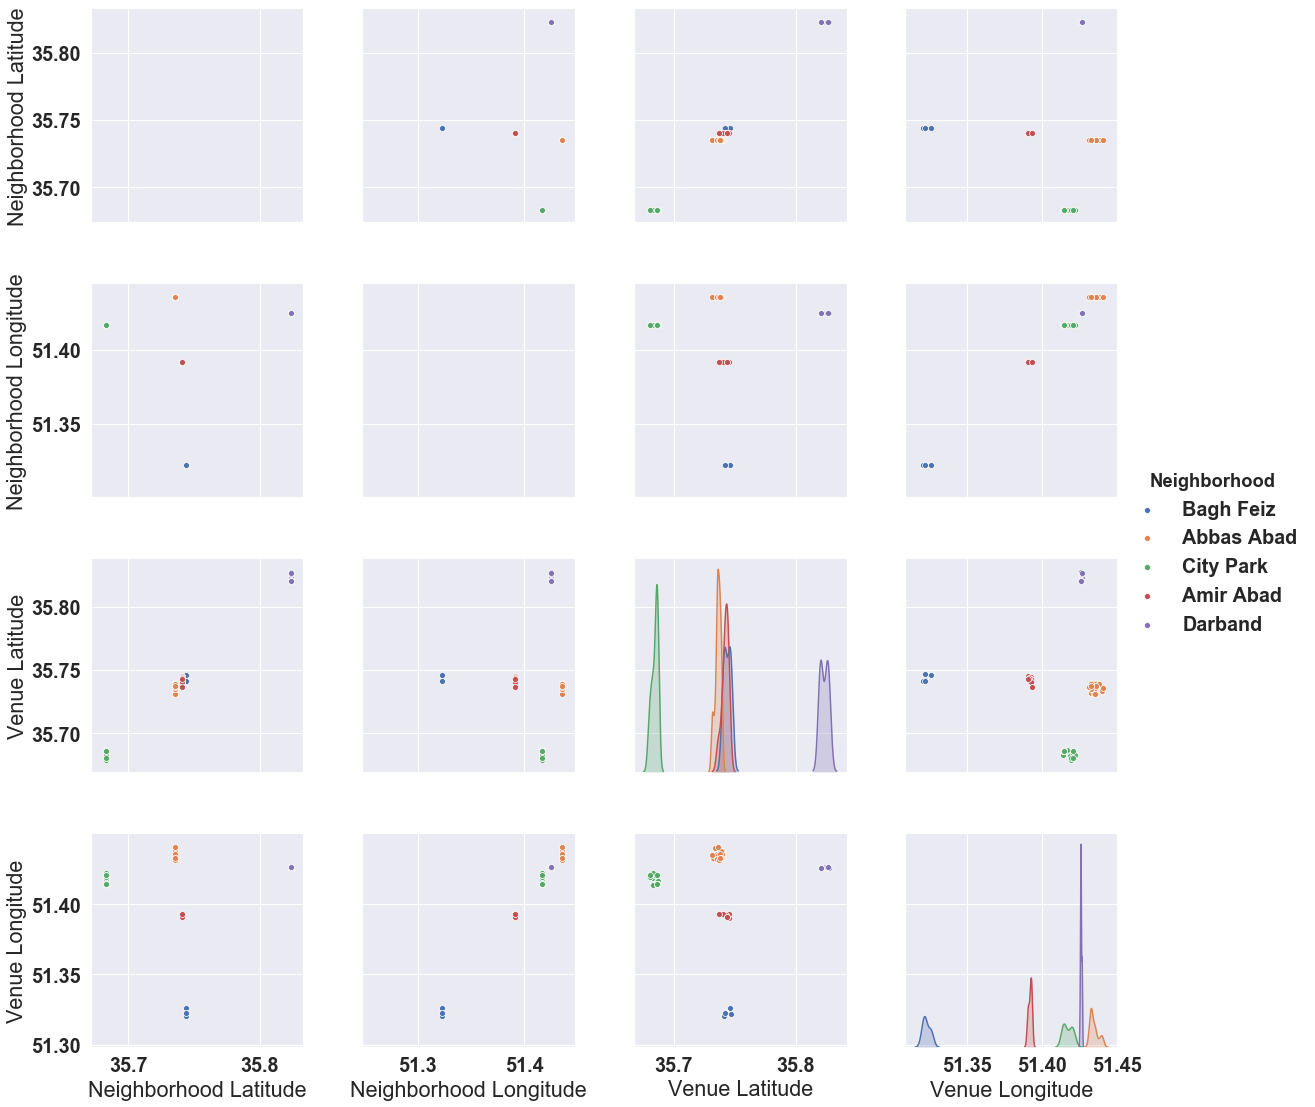

In [15]:
sns.set_style('darkgrid')
sns.pairplot(venues_Tehran,size=4,aspect=1,hue="Neighborhood");

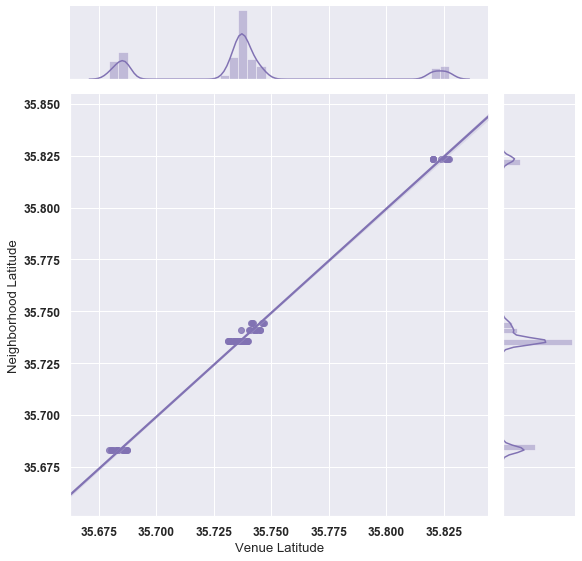

In [35]:
sns.set_style('darkgrid')
sns.set(font_scale=1.1)  
sns.jointplot('Venue Latitude','Neighborhood Latitude',data=venues_Tehran,color="m",kind="reg",size=8);

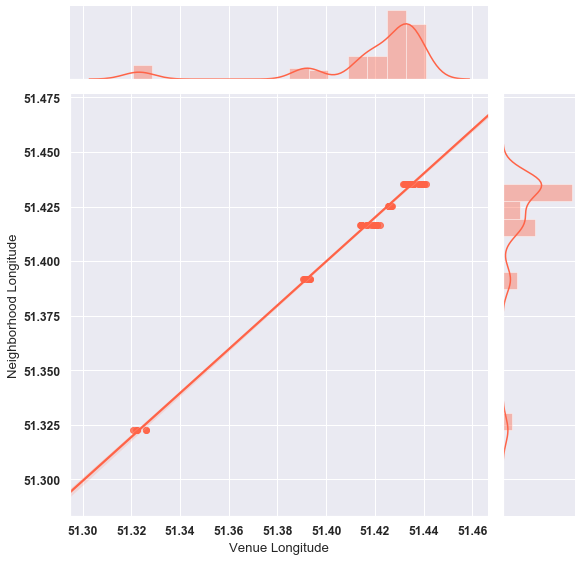

In [38]:
sns.set_style('darkgrid')
sns.set(font_scale=1.1)  
sns.jointplot('Venue Longitude','Neighborhood Longitude',data=venues_Tehran,color="TOMATO",kind="reg",size=8);

#### Distinguishing venues values by dummies function

In [16]:
tehran = pd.get_dummies(venues_Tehran[['Venue Category']], prefix="", prefix_sep="")
tehran['Neighborhood'] = venues_Tehran['Neighborhood'] 
fixed_columns = [tehran.columns[-1]] + list(tehran.columns[:-1])
tehran = tehran[fixed_columns]
tehran

,Neighborhood,Art Gallery,Art Museum,Arts & Crafts Store,BBQ Joint,Bakery,Breakfast Spot,Burger Joint,Café,Candy Store,...,Sandwich Place,Soccer Field,Sports Club,Steakhouse,Street Food Gathering,Supermarket,Tabbakhi,Tea Room,Vegetarian / Vegan Restaurant,Women's Store
0,Bagh Feiz,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bagh Feiz,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bagh Feiz,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bagh Feiz,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bagh Feiz,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Bagh Feiz,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Abbas Abad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,Abbas Abad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Abbas Abad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Abbas Abad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
tehran['Art Gallery'].value_counts()

0    88
1     1
Name: Art Gallery, dtype: int64

##### there is 1 Art Gallery in these Neighborhoods

In [18]:
tehran['Café'].value_counts()

0    84
1     5
Name: Café, dtype: int64

##### there is 5 Café in these Neighborhoods

In [19]:
teh_gp = tehran.groupby('Neighborhood').mean().reset_index()
teh_gp.head()

,Neighborhood,Art Gallery,Art Museum,Arts & Crafts Store,BBQ Joint,Bakery,Breakfast Spot,Burger Joint,Café,Candy Store,...,Sandwich Place,Soccer Field,Sports Club,Steakhouse,Street Food Gathering,Supermarket,Tabbakhi,Tea Room,Vegetarian / Vegan Restaurant,Women's Store
0,Abbas Abad,0.000000,0.00,0.023256,0.023256,0.023256,0.000000,0.093023,0.093023,0.023256,...,0.116279,0.000000,0.000000,0.023256,0.0,0.023256,0.00,0.000000,0.023256,0.023256
1,Amir Abad,0.000000,0.00,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000,...,0.000000,0.222222,0.111111,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000
2,Bagh Feiz,0.000000,0.00,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000
3,City Park,0.000000,0.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.1,0.000000,0.05,0.000000,0.000000,0.000000
4,Darband,0.090909,0.00,0.000000,0.000000,0.000000,0.090909,0.000000,0.090909,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.181818,0.000000,0.000000


#### Correlation bettwen veneus :

In [29]:
teh_gp.corr()

,Art Gallery,Art Museum,Arts & Crafts Store,BBQ Joint,Bakery,Breakfast Spot,Burger Joint,Café,Candy Store,Clothing Store,...,Sandwich Place,Soccer Field,Sports Club,Steakhouse,Street Food Gathering,Supermarket,Tabbakhi,Tea Room,Vegetarian / Vegan Restaurant,Women's Store
Art Gallery,1.000000,-0.250000,-0.250000,-0.250000,-0.369176,1.000000,-0.405603,0.600575,-0.250000,-0.250000,...,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,1.000000,-0.250000,-0.250000
Art Museum,-0.250000,1.000000,-0.250000,-0.250000,-0.369176,-0.250000,-0.405603,-0.408203,-0.250000,-0.250000,...,-0.250000,-0.250000,-0.250000,-0.250000,1.000000,-0.250000,1.000000,-0.250000,-0.250000,-0.250000
Arts & Crafts Store,-0.250000,-0.250000,1.000000,1.000000,-0.277392,-0.250000,0.518556,0.624035,1.000000,1.000000,...,1.000000,-0.250000,-0.250000,1.000000,-0.250000,1.000000,-0.250000,-0.250000,1.000000,1.000000
BBQ Joint,-0.250000,-0.250000,1.000000,1.000000,-0.277392,-0.250000,0.518556,0.624035,1.000000,1.000000,...,1.000000,-0.250000,-0.250000,1.000000,-0.250000,1.000000,-0.250000,-0.250000,1.000000,1.000000
Bakery,-0.369176,-0.369176,-0.277392,-0.277392,1.000000,-0.369176,-0.143843,-0.527001,-0.277392,-0.277392,...,-0.277392,0.069348,0.069348,-0.277392,-0.369176,-0.277392,-0.369176,-0.369176,-0.277392,-0.277392
Breakfast Spot,1.000000,-0.250000,-0.250000,-0.250000,-0.369176,1.000000,-0.405603,0.600575,-0.250000,-0.250000,...,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,1.000000,-0.250000,-0.250000
Burger Joint,-0.405603,-0.405603,0.518556,0.518556,-0.143843,-0.405603,1.000000,0.100888,0.518556,0.518556,...,0.518556,0.698254,0.698254,0.518556,-0.405603,0.518556,-0.405603,-0.405603,0.518556,0.518556
Café,0.600575,-0.408203,0.624035,0.624035,-0.527001,0.600575,0.100888,1.000000,0.624035,0.624035,...,0.624035,-0.408203,-0.408203,0.624035,-0.408203,0.624035,-0.408203,0.600575,0.624035,0.624035
Candy Store,-0.250000,-0.250000,1.000000,1.000000,-0.277392,-0.250000,0.518556,0.624035,1.000000,1.000000,...,1.000000,-0.250000,-0.250000,1.000000,-0.250000,1.000000,-0.250000,-0.250000,1.000000,1.000000
Clothing Store,-0.250000,-0.250000,1.000000,1.000000,-0.277392,-0.250000,0.518556,0.624035,1.000000,1.000000,...,1.000000,-0.250000,-0.250000,1.000000,-0.250000,1.000000,-0.250000,-0.250000,1.000000,1.000000


### Below part shows some Veneus density in Neighbors:

In [20]:
gpby=teh_gp.groupby(['Neighborhood'])['Café'].value_counts(normalize=True)
gpby=pd.DataFrame(gpby)
gpby

,,Café
Neighborhood,Café,
Abbas Abad,0.093023,1.0
Amir Abad,0.000000,1.0
Bagh Feiz,0.000000,1.0
City Park,0.000000,1.0
Darband,0.090909,1.0


In [21]:
gpby1=teh_gp.groupby(['Neighborhood'])['Bakery'].value_counts(normalize=True)
gpby1=pd.DataFrame(gpby)
gpby1

,,Café
Neighborhood,Café,
Abbas Abad,0.093023,1.0
Amir Abad,0.000000,1.0
Bagh Feiz,0.000000,1.0
City Park,0.000000,1.0
Darband,0.090909,1.0


In [22]:
gpby3=teh_gp.groupby(['Neighborhood'])['Art Gallery'].value_counts()
gpby3=pd.DataFrame(gpby)
gpby3

,,Café
Neighborhood,Café,
Abbas Abad,0.093023,1.0
Amir Abad,0.000000,1.0
Bagh Feiz,0.000000,1.0
City Park,0.000000,1.0
Darband,0.090909,1.0


In [23]:
num_top_venues = 7

for hood in teh_gp['Neighborhood']:
    print("----"+hood+"----")
    temp = teh_gp[teh_gp['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abbas Abad----
                  venue  freq
0        Sandwich Place  0.12
1    Persian Restaurant  0.09
2          Burger Joint  0.09
3                  Café  0.09
4  Fast Food Restaurant  0.07
5           Pastry Shop  0.05
6                 Plaza  0.05


----Amir Abad----
                     venue  freq
0             Soccer Field  0.22
1                   Market  0.11
2                      Gym  0.11
3                   Bakery  0.11
4             Burger Joint  0.11
5              Sports Club  0.11
6  Health & Beauty Service  0.11


----Bagh Feiz----
                    venue  freq
0                  Bakery  0.33
1                    Park  0.17
2             Pastry Shop  0.17
3  Furniture / Home Store  0.17
4                   Plaza  0.17
5             Art Gallery  0.00
6              Restaurant  0.00


----City Park----
                   venue  freq
0         History Museum  0.15
1             Food Stand  0.10
2                  Plaza  0.10
3                   Park  0.10
4  Str

In [24]:
def common_venus(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
num_top_venues = 7

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = teh_gp['Neighborhood']

for ind in np.arange(teh_gp.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = common_venus(teh_gp.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Abbas Abad,Sandwich Place,Café,Burger Joint,Persian Restaurant,Fast Food Restaurant,Pastry Shop,Italian Restaurant
1,Amir Abad,Soccer Field,Market,Health & Beauty Service,Gym / Fitness Center,Bakery,Gym,Sports Club
2,Bagh Feiz,Bakery,Furniture / Home Store,Park,Pastry Shop,Plaza,Women's Store,Dairy Store
3,City Park,History Museum,Park,Food Stand,Street Food Gathering,Plaza,Coffee Shop,Monument / Landmark
4,Darband,Tea Room,Persian Restaurant,Art Gallery,Café,Mountain,Plaza,Restaurant
